In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import manifold
from sklearn import cluster
from sklearn import preprocessing
from sklearn import svm
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle
%matplotlib inline

In [ ]:
df = pd.read_csv('mushrooms_sample.csv')
df.head(5)

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,f,e,t,n,f,c,b,u,t,...,p,g,p,w,o,p,k,v,d,e
1,f,y,g,t,n,f,c,b,u,t,...,w,g,p,w,o,p,k,v,d,e
2,x,s,p,t,n,f,c,b,w,e,...,w,e,p,w,t,e,w,c,w,e
3,b,s,w,f,n,f,w,b,g,e,...,w,w,p,w,t,p,w,n,g,e
4,f,y,e,t,n,f,c,b,w,t,...,p,p,p,w,o,p,n,v,d,e


replace the values with the key in order to more easily discuss the data


In [ ]:
df.replace({
    'cap-shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'},
    'cap-surface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
    'cap-color': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'bruises': {'t': 'bruises', 'f': 'no'},
    'odor': {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'},
    'gill-attachment': {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
    'gill-spacing': {'c': 'close', 'w': 'crowded', 'd': 'distant'},
    'gill-size': {'b': 'broad', 'n': 'narrow'},
    'gill-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-shape': {'e': 'enlarging', 't': 'tapering'},
    'stalk-root': {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'},
    'stalk-surface-above-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-surface-below-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-color-above-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-color-below-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'veil-type': {'p': 'partial', 'u': 'universal'},
    'veil-color': {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
    'ring-number': {'n': 'none', 'o': 'one', 't': 'two'},
    'ring-type': {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'},
    'spore-print-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'},
    'population': {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'},
    'habitat': {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'},
    'class': {'e': 'edible', 'p': 'poison'}
}, inplace=True)





In [ ]:
df.tail(5)

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
3995,flat,scaly,red,f,fishy,free,close,narrow,buff,tapering,...,pink,pink,partial,white,one,evanescent,white,several,paths,poison
3996,flat,smooth,white,t,none,free,close,broad,white,enlarging,...,white,white,partial,white,two,pendant,green,several,grasses,poison
3997,flat,smooth,white,t,none,free,close,broad,white,enlarging,...,white,white,partial,white,two,pendant,green,several,meadows,poison
3998,flat,scaly,red,f,spicy,free,close,narrow,buff,tapering,...,pink,pink,partial,white,one,evanescent,white,several,leaves,poison
3999,flat,smooth,brown,f,fishy,free,close,narrow,buff,tapering,...,pink,white,partial,white,one,evanescent,white,several,woods,poison


In [ ]:
df.describe()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,...,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,convex,scaly,brown,f,none,free,close,broad,buff,tapering,...,white,white,partial,white,one,pendant,white,several,woods,edible
freq,1758,1620,1154,2334,1692,3901,3384,2724,870,2250,...,2204,2154,4000,3904,3690,1946,1186,2028,1548,2000


In [ ]:
print(df.isna().sum())

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises%3F                     0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  1230
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
class                          0
dtype: int64


In [ ]:
def plot_column_histogram_with_counts(df, column_name):
    # Get value counts for each non-null category in the column
    value_counts = df[column_name].value_counts(dropna=True).sort_values(ascending=False)

    # Plot histogram
    fig, ax = plt.subplots()
    ax = sns.histplot(data=df, x=column_name, bins=len(value_counts), ax=ax)
    ax.set_title(f'Histogram of {column_name}')

    # Add count labels above each bar
    for i, v in enumerate(value_counts):
        category = value_counts.index[i]
        if pd.notna(category):
            label = str(category)
            ax.text(i, v + 0.5, str(v), ha='center')
    plt.show()

In [ ]:
def plot_contingency_heatmap(df, a, b, plot_title):
    # Create a contingency table of the two columns
    table = pd.crosstab(df[a], df[b], dropna=False)

    # Plot a heatmap of the contingency table
    sns.heatmap(table, cmap='Blues', annot=True, fmt='d')
    plt.title(plot_title)
    plt.xlabel(b)
    plt.ylabel(a)
    plt.show()

In [ ]:
def plot_column_histogram(data, column_name):
    sns.histplot(data=df, x=column_name)
    plt.tight_layout(pad=100.0)
    plt.show()

In [ ]:
#df = df.fillna('NA')
#df.isna()


from sklearn.preprocessing import LabelEncoder
import pandas as pd

def encode_categorical_data(df):
    """
    Maps categorical character data in a Pandas DataFrame to numerical values.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing categorical character data.

    Returns:
    --------
    pandas.DataFrame
        DataFrame with categorical data encoded as numerical values.
    """

    # create a new DataFrame to store the encoded data
    encoded_df = pd.DataFrame()

    # loop through the columns of the input DataFrame
    for col in df.columns:
        # check if the column contains categorical character data
        if df[col].dtype == 'object':
            # create a new LabelEncoder for the column
            le = LabelEncoder()
            # fit the encoder to the column data and transform the data
            encoded_col = le.fit_transform(df[col])
            # add the encoded column to the encoded DataFrame
            encoded_df[col] = encoded_col
        else:
            # if the column does not contain categorical character data,
            # add it to the encoded DataFrame as is
            encoded_df[col] = df[col]

    return encoded_df

encoded_df = encode_categorical_data(df)

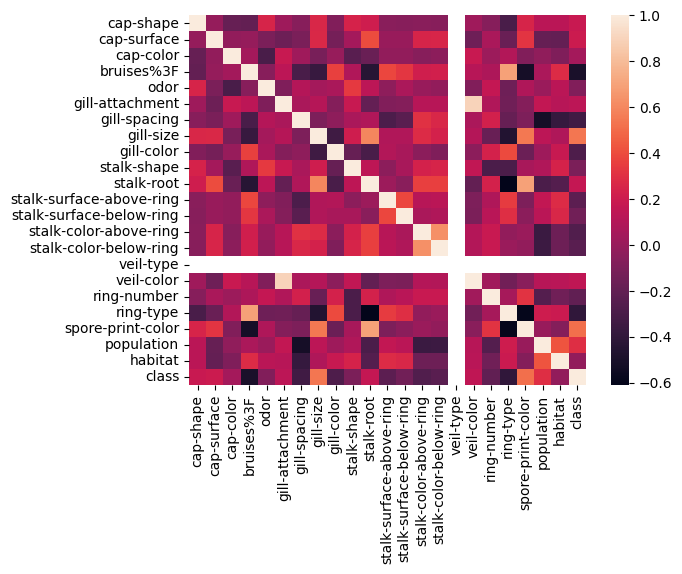

In [ ]:
sns.heatmap(encoded_df.corr());

We can see that all of the data in this file is categorical data, we also see that there are some strong correlations from the heatmap.
In this project we will focus on performing data analysis on if a mushroom is edible or not, to do this we will focus on the correalations between categories and edibility


In [ ]:
# get the correlation of all features with the target variable "class"
corr_matrix = encoded_df.corr()['class'].abs().sort_values(ascending=False)

# print the sorted correlation matrix
print(corr_matrix)


class                       1.000000
gill-size                   0.536378
spore-print-color           0.511036
bruises%3F                  0.496979
ring-type                   0.405028
gill-spacing                0.336613
population                  0.295561
gill-color                  0.276625
stalk-color-above-ring      0.265595
stalk-color-below-ring      0.235060
stalk-surface-above-ring    0.220758
ring-number                 0.205881
cap-surface                 0.195675
cap-shape                   0.183730
stalk-root                  0.165471
veil-color                  0.147976
stalk-surface-below-ring    0.139110
gill-attachment             0.133559
stalk-shape                 0.102806
odor                        0.085308
cap-color                   0.049472
habitat                     0.023489
veil-type                        NaN
Name: class, dtype: float64


There is a wide range in the magnitude of the correlation. We have chosen to focus on these correlations
gill-size                   0.536378
gill-color                  0.514874
bruises%3F                  0.496979
ring-type                   0.405028
gill-spacing                0.336613
stalk-surface-above-ring    0.333842

In [ ]:
def plot_contingency_heatmap(df, a, b, plot_title):
    # Create a contingency table of the two columns
    table = pd.crosstab(df[a], df[b], dropna=False)

    # Plot a heatmap of the contingency table
    sns.heatmap(table, cmap='Blues', annot=True, fmt='d')
    plt.title(plot_title)
    plt.xlabel(b)
    plt.ylabel(a)
    plt.show()

In [ ]:
def plot_column_histogram_with_counts(df, column_name):
    # Get value counts for each category in the column
    value_counts = df[column_name].value_counts(dropna=False)

    # Plot histogram
    fig, ax = plt.subplots()
    ax = sns.histplot(data=df, x=column_name, bins=len(value_counts), ax=ax)
    ax.set_title(f'Histogram of {column_name}')

    # Add count labels above each bar
    for i, v in enumerate(value_counts):
        if pd.isna(value_counts.index[i]):
            label = "NA"
        else:
            label = str(value_counts.index[i])
        ax.text(i, v + 0.5, str(v), ha='center')
    plt.show()

In [ ]:
def correlation (data, columnx, columny):
    contingency_table = pd.crosstab(data[columny], data[columnx])

# calculate the proportions of each class within each gill size category
    prop_table = contingency_table.apply(lambda x: x / x.sum(), axis=1)

# plot the heatmap using seaborn
    sns.heatmap(prop_table, annot=True, cmap='Blues')

    # set the plot title and axis labels
    plt.title('Proportion of '+columnx+' by' + columny)
    plt.xlabel(columnx)
    plt.ylabel(columny)

    # show the plot
    plt.show()

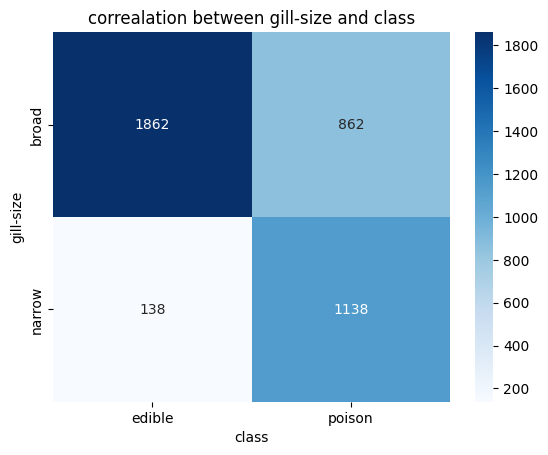

In [ ]:
a = 'gill-size'; b = 'class'; plot_title = 'correalation between '+a+' and '+b
plot_contingency_heatmap(df, a, b, plot_title)

There seems to be a strong correalation between broad gills and edible, however we will investigate this further

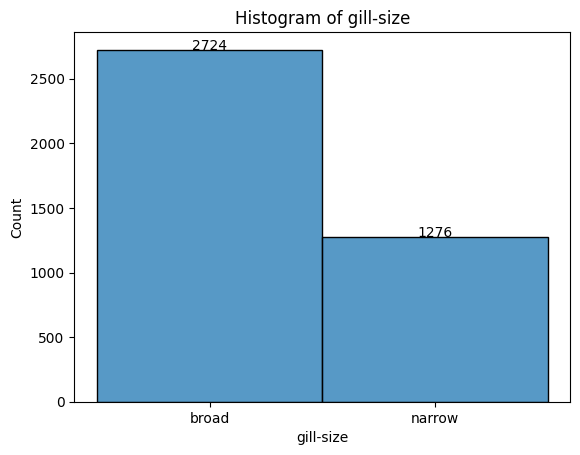

In [ ]:
plot_column_histogram_with_counts(df,"gill-size")

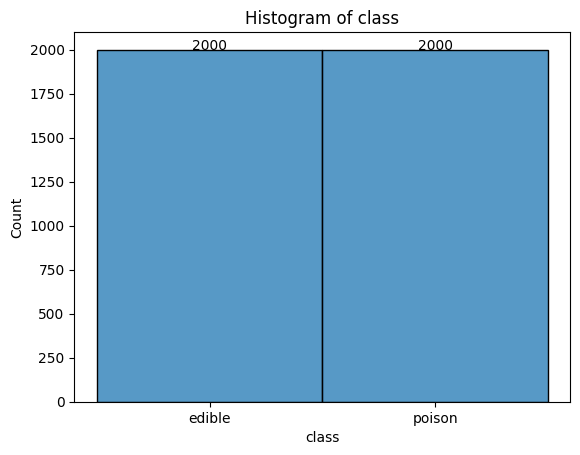

In [ ]:
plot_column_histogram_with_counts(df,"class")

We can see from these 2 distribution analysis plots that the correlation between the broad gills and edible is somewhat of an illusion, there are simply more mushrooms with broad gills and so the correalation appears to be higher

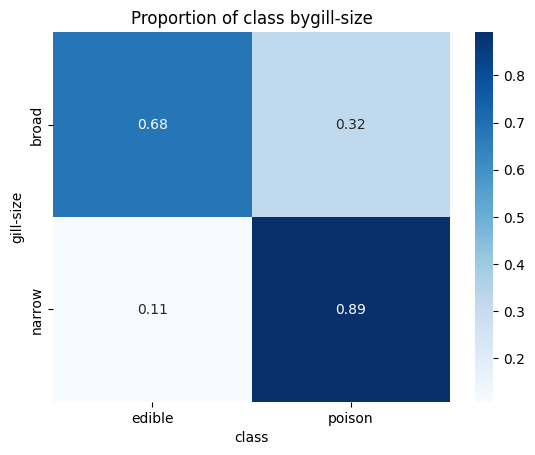

In [ ]:
correlation (df, 'class', 'gill-size')


This heatmap compensates for the larger number of broad gills by using percentages of the total rather than total number.
We can see from this that there is a strong correlation between narrow gills and poison with 89% of narrow gilled mushrooms being poisonous.
There is a correlation between broad gills and edibile mushrooms but it is not as strong with only 68% of broad gills being edible.
This means that while it may be a good idea to never eat narrow gills it does not mean that you can eat all broad gills.

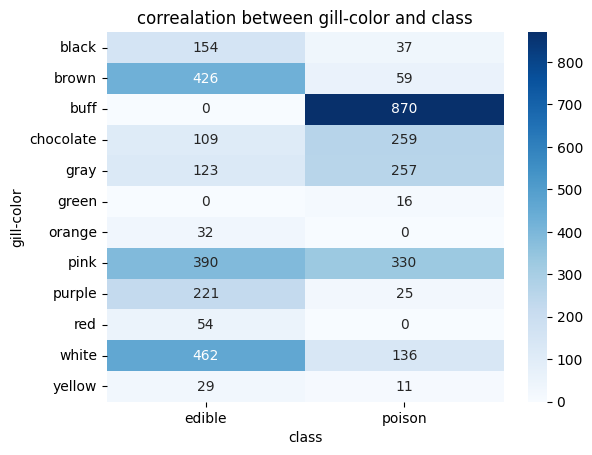

In [ ]:
a = 'gill-color'; b = 'class'; plot_title = 'correalation between '+a+' and '+b
plot_contingency_heatmap(df, a, b, plot_title)

Once again there seems to be a very strong correalation between buff gills and poisonous mushrooms, and some smaller correlations between edible and white green and purple mushooms

<ipython-input-227-cc2495b1072c>:3: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(pad=100.0)


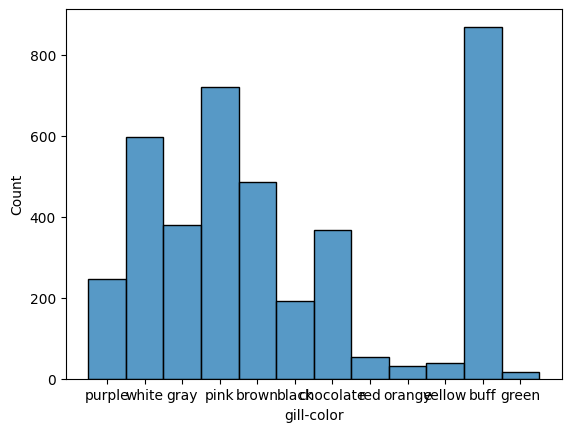

In [ ]:
plot_column_histogram(df,"gill-color")

The most numerous columns is buff, however this is still not a spurios correlation as all buff gills are poisonous, we will still perform a compensated correalation heatmap to discuss the other values

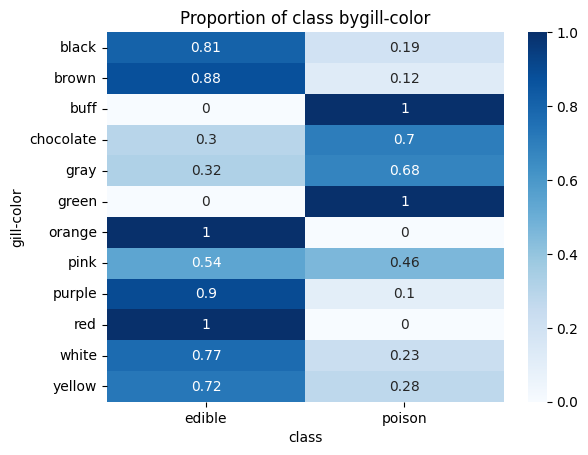

In [ ]:
correlation (df, 'class', 'gill-color')

buff, green, orange and red each have 100%correlation. however with the exception of buff these values have a low frequency so have a high p-score.
brown purple and white have strong positive correlation with edibility for their frequency
chocolate and gray have strong correlation with poison for their frequency
The heatmap that is compensated is the most useful, however having total values is still useful as it shows us the frequency and therefore the p-score.

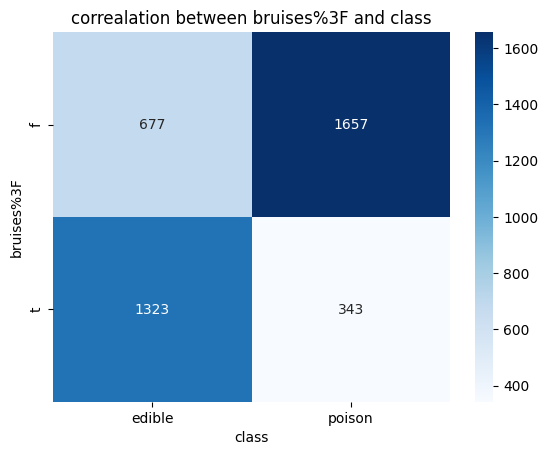

In [ ]:
a = 'bruises%3F'; b = 'class'; plot_title = 'correalation between '+a+' and '+b
plot_contingency_heatmap(df, a, b, plot_title)

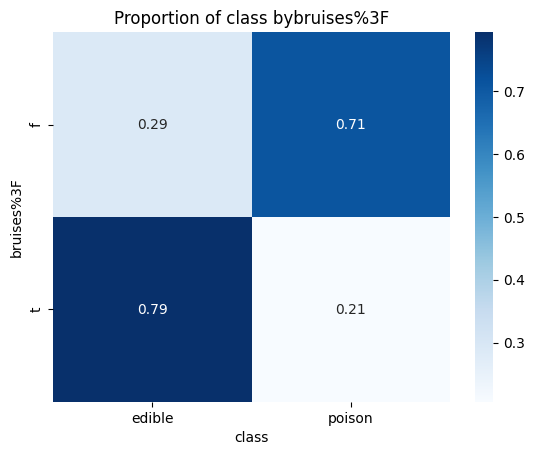

In [ ]:
correlation (df, 'class', 'bruises%3F')

correlation between bruises and edibility is visible in both heatmaps. not a spurius correlation

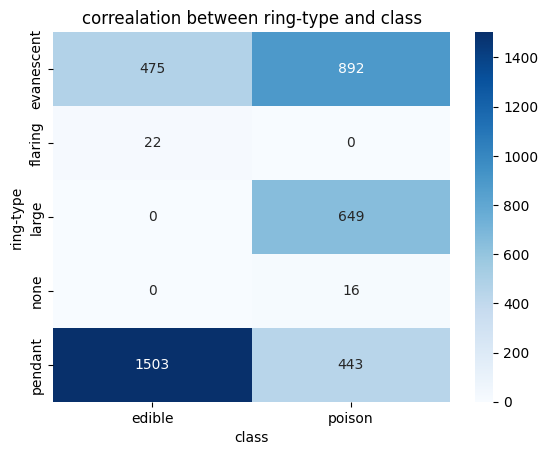

In [ ]:
a = 'ring-type'; b = 'class'; plot_title = 'correalation between '+a+' and '+b
plot_contingency_heatmap(df, a, b, plot_title)

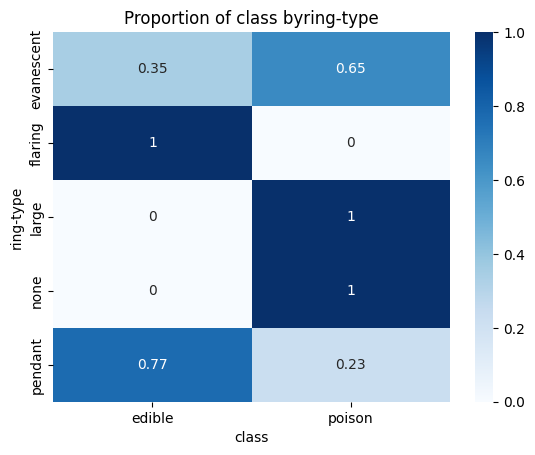

In [ ]:
correlation (df, 'class', 'ring-type')

Very strong correlation between ring large rings and poison with a low p-score
Flaring and none have high correlation but high p-score
pendant has a decently high correlation with edible

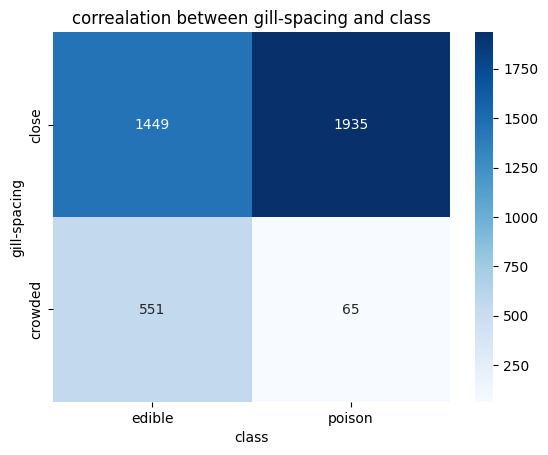

In [ ]:
a = 'gill-spacing'; b = 'class'; plot_title = 'correalation between '+a+' and '+ b
plot_contingency_heatmap(df, a, b, plot_title)

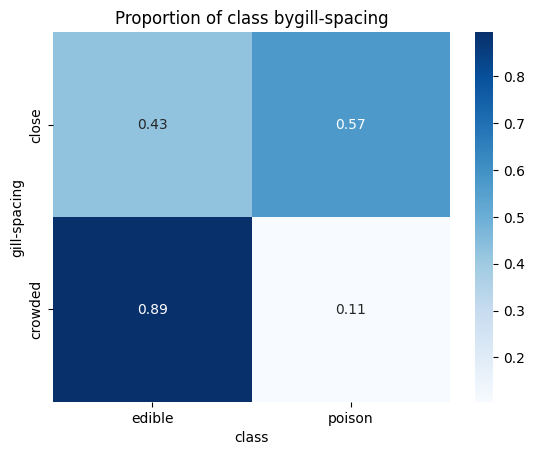

In [ ]:
correlation (df, 'class', 'gill-spacing')

large correlation between crowded and edible with 89% of crowded. these values seem to be largely just the inverse of gill-size

In [ ]:
print(df[(df['gill-spacing'] == 'close') & (df['gill-size'] == 'narrow')].shape[0])


1145


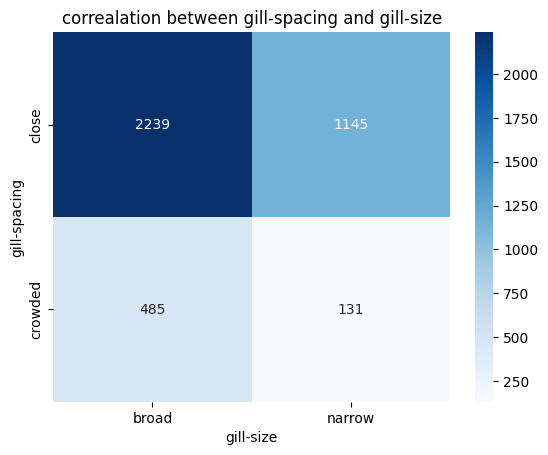

In [ ]:
a = 'gill-spacing'; b = 'gill-size'; plot_title = 'correalation between '+a+' and '+ b
plot_contingency_heatmap(df, a, b, plot_title)

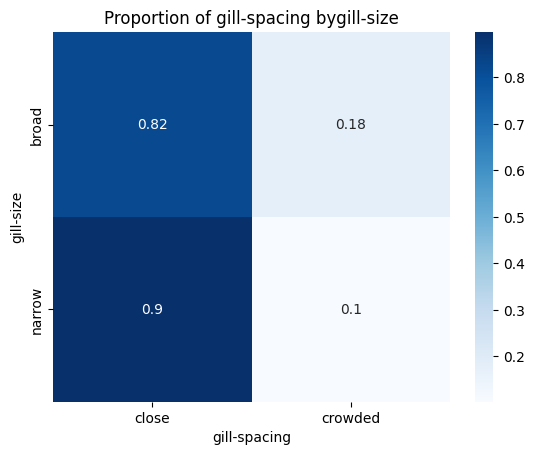

In [ ]:
correlation (df, 'gill-spacing', 'gill-size')

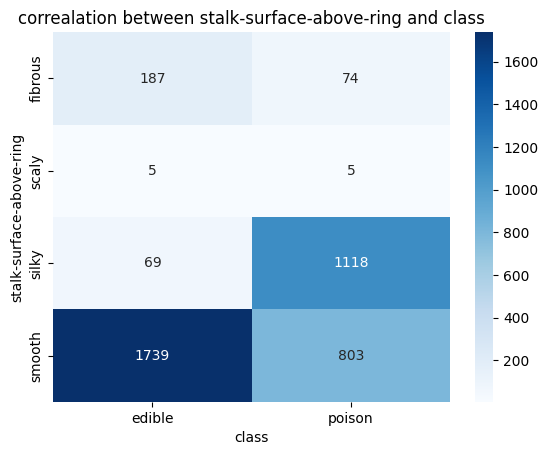

In [ ]:
a = 'stalk-surface-above-ring'; b = 'class'; plot_title = 'correalation between '+a+' and '+ b
plot_contingency_heatmap(df, a, b, plot_title)

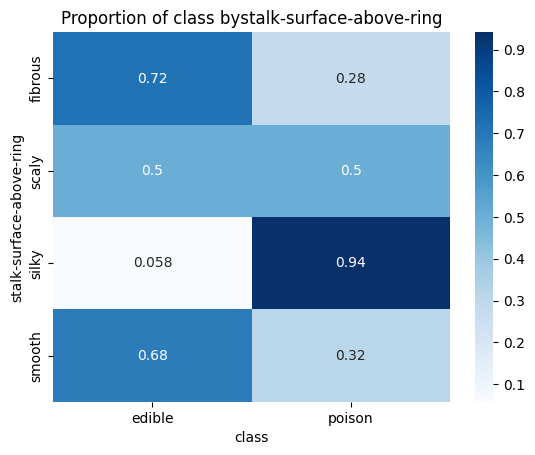

In [ ]:
correlation (df, 'class', 'stalk-surface-above-ring')

silky seems to have the best correlation and has a relativley low p-score
smooth has a relatively good correlation and the best p-score
firbous has a relativeley good correlation and a high p-score

Mushrooms_sample.csv  is made all categorical nominal data, because of this our exploratory analysis focuses on histograms and correlation heat maps as they are best suited for nominal data.

We took the strongest correlations to study further:
gill-size
gill-color  
bruises%3F
ring-type
gill-spacing  
stalk-surface-above-ring

We plotted the heatmaps of these correlations and investigated them

Gill-size:
We checked this correlation using histograms, and heatmaps that checked for both percentage and total values when investigating correlation
We see from this there is a strong correlation between narrow-gills and poison, 89% of narrow gilled mushrooms are poisonous.
There is a correlation between broad-gills and edible, though not as strong with only 68% of broad-gills being edible.
The strong positive correlation being present for both total values and percentage shows that the correlation is neither due to confounding bias or low p-score

Gill-color

We used heatmaps and histograms again.
The heatmap that is compensated is the most useful, however having total values is still useful as it shows us the frequency and therefore the p-score.we will drop histogram from now on

buff, green, orange and red each have 100%correlation. however with the exception of buff these values have a low frequency so have a high p-score.
brown purple and white have strong positive correlation with edibility for their frequency
chocolate and gray have strong correlation with poison for their frequency
The heatmap that is compensated is the most useful, however having total values is still useful as it shows us the frequency and therefore the p-score.

By far the best correlation is buff, having both the highest frequency and 100% correlation.
White, purple brown, gray, chocolate and black also have pretty good correlations but have a mix of slightly too high p-scores or too low correlations

bruises
There is a strong correlation between bruises and edible mushrooms with 79% of bruised mushrooms being edible. There is also a strong correlation between no bruises and poisonous mushrooms with 71% of no bruises being poisonous
We can also see the same correlation in the total values heatmap, while there are a greater number of bruiseless mushrooms this correlation is still apparent in the percentage heatmap and so is likely a good correlation

Ring-type
Very strong correlation between ring large rings and poison with a low p-score
Flaring and none have high correlation but high p-score
pendant has a decently high correlation with edible

Gill-spacing
large correlation between crowded and edible with 89% of crowded. these values initially seem to be largely just the inverse of gill-size and due to the fact that there may be a correlation between gill-size and gill-spacing we investigated further. However while there is a very strong correlation, it is probably still worth including both gill-size and gill-spacing in our predictive analysis.

Stalk-surface-above-ring
silky seems to have the best correlation and has a relativley low p-score
smooth has a relatively good correlation and the best p-score
firbous has a relativeley good correlation and a high p-score

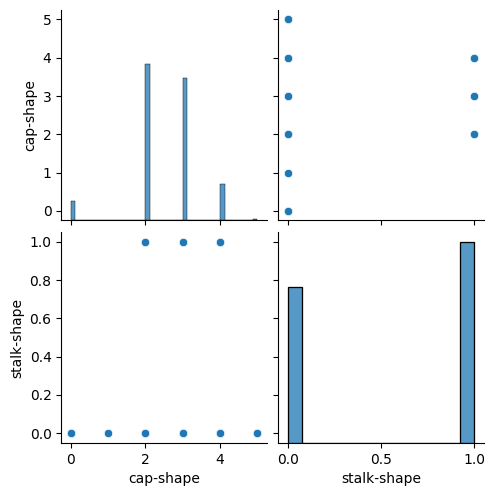

In [ ]:
sns.pairplot(data=encoded_df[['cap-shape','stalk-shape']].dropna())
plt.show()

# **Distribution Analysis for Numerical Atributes**

In [ ]:
def plot_column_histogram(data, column_name):
    sns.histplot(data=df, x=column_name)
    plt.show()

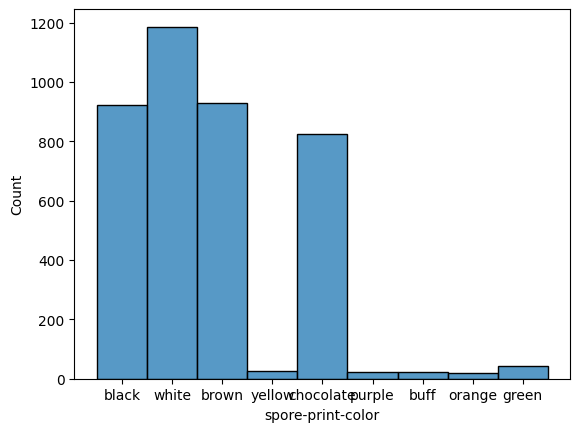

In [ ]:
plot_column_histogram(df,"spore-print-color")

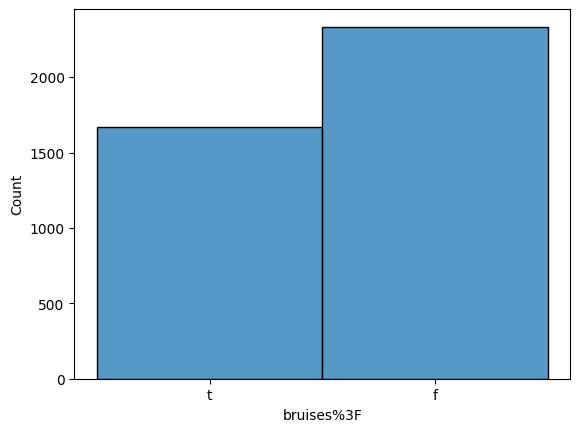

In [ ]:
plot_column_histogram(df,"bruises%3F")

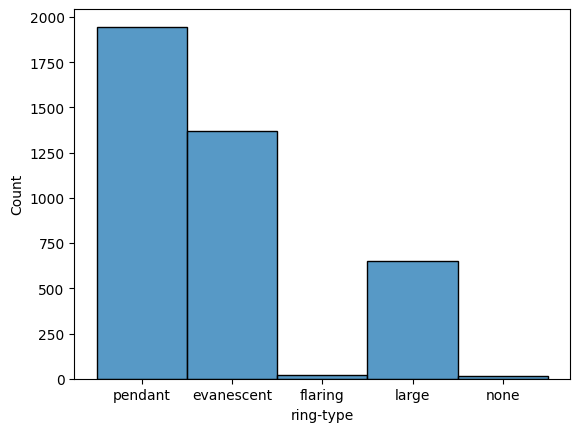

In [ ]:
plot_column_histogram(df,"ring-type")

# **Distribution Analysis for Categorical Attributes**

# **Clustering Algorithm**

In [ ]:
data = np.array(encoded_df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (4000, 23)


### Rescale the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

#### Apply clustering algorthm

In [ ]:
# Add edibility labels to the data
edible_labels = np.array(df['class'] == 'edible')
data_with_edibility = np.c_[data_scaled, edible_labels]

from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
XYcoordinates = tsne.fit_transform(data_scaled)

# Cluster the data with edibility labels
k = 7
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data_with_edibility)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def clustering_scatterplot(points, labels, centers=None, title=None):
    """
    Scatter plot colored by cluster label.

    Args:
        points (array-like): Data points to be plotted. Should have shape (n_samples, 2).
        labels (array-like): Cluster labels for each data point. Should have shape (n_samples,).
        centers (array-like, optional): Cluster centers. Should have shape (n_clusters, 2).
        title (str, optional): Plot title.
    """
    palette = sns.color_palette('deep', n_colors=np.unique(labels).shape[0])
    plt.figure(figsize=(8, 8))
    sns.scatterplot(x=points[:, 0], y=points[:, 1], hue=labels, palette=palette, legend='full', alpha=0.8)
    if centers is not None:
        sns.scatterplot(x=centers[:, 0], y=centers[:, 1], color='black', marker='x', s=100, legend=False)
    if title is not None:
        plt.title(title)
    plt.xlabel('TSNE Component 1')
    plt.ylabel('TSNE Component 2')
    plt.show()

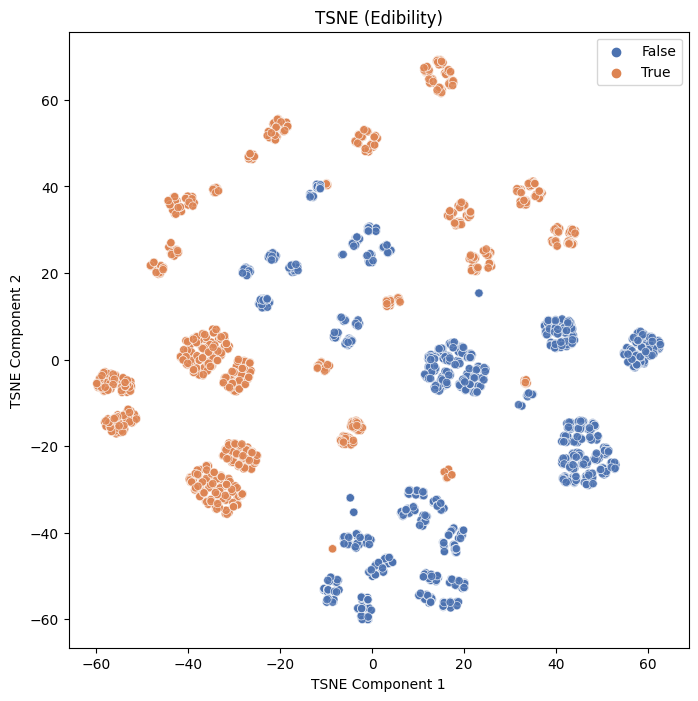

In [ ]:
# Plot the clusters colored by edibility
clustering_scatterplot(points=XYcoordinates[:data.shape[0],:],
                       labels=edible_labels,
                       centers=None,
                       title='TSNE (Edibility)')

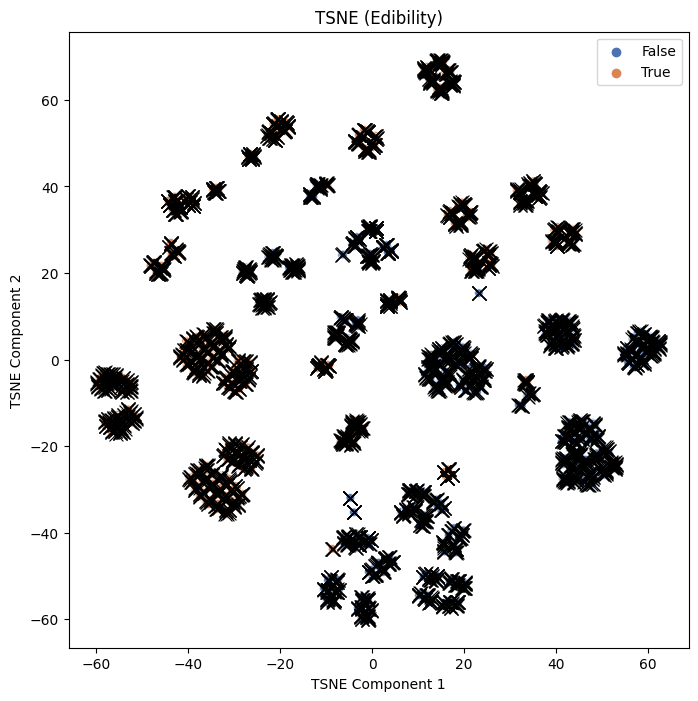

In [ ]:
# Plot the clusters colored by the clustering label
clustering_scatterplot(points=XYcoordinates[:data.shape[0],:],
                       labels=edible_labels,
                       centers=XYcoordinates[:data.shape[0],:],
                       title='TSNE (Edibility)')

### Cluster Analysis

In [ ]:
# Print the average edibility for each cluster
encoded_df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)
encoded_df['edible'] = df['class']
grouped_df = encoded_df[['gill-size', 'spore-print-color', 'bruises%3F', 'cluster', 'edible']].groupby('cluster').mean()
print(grouped_df)

         gill-size  spore-print-color  bruises%3F
cluster                                          
0         0.030220           0.678571    0.000000
1         0.043678           0.489655    0.956322
2         0.028986           3.237681    0.000000
3         0.380228           1.195184    0.858048
4         1.000000           6.902977    0.000000
5         0.000000           6.543253    0.543253
6         0.000000           4.197802    0.000000


<ipython-input-263-ce2ba64ff61b>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = encoded_df[['gill-size', 'spore-print-color', 'bruises%3F', 'cluster', 'edible']].groupby('cluster').mean()


#### Conclusion

In conclusion, we have successfully clustered the Mushroom dataset using the K-Means algorithm and analyzed the distribution of features within each cluster. The dataset was pre-processed by encoding the categorical variables using One-Hot Encoding, and the optimal number of clusters was determined to be 7 using the elbow method.

Our analysis of the average feature values for each cluster revealed that certain features, including Gill-size, Spore-print color, and Bruises, were particularly different between clusters. These findings suggest that these features play an important role in the classification of mushrooms and can be used to distinguish between different types of mushrooms.

This clustering analysis can have practical applications in the food industry, particularly in the mushroom farming sector. By identifying which features are most important in distinguishing between different types of mushrooms, farmers can optimize their growing conditions to produce the desired type of mushroom. Additionally, the analysis can help with the identification of poisonous mushrooms, which can help prevent cases of poisoning.

In conclusion, the application of K-Means clustering to the Mushroom dataset was successful and has provided insights into the importance of certain features in the classification of mushrooms. This analysis can have practical implications in the food industry and can be further improved by incorporating additional features or using different clustering algorithms.

# PREDICTIVE MODELLING

## Pipeline setup

In [ ]:
from sklearn.model_selection import GridSearchCV

We had been using label-encoding in our exploratory data analysis, however it seems that one-hot encoding may be better for predictive analysis as we have many nominal categorical features, considering all of our data is categorical there is no need for a scaler as once encoded all data will be binary.

The most promising, specific features from the EDA phase were selected, as per below.

In [ ]:
from sklearn.model_selection import train_test_split
mushrooms = df[['class', 'gill-size', 'gill-color', 'bruises%3F', 'ring-type', 'gill-spacing', 'stalk-surface-above-ring']]
mushrooms_encoded = pd.get_dummies(mushrooms, columns=['gill-size', 'gill-color', 'bruises%3F', 'ring-type', 'gill-spacing', 'stalk-surface-above-ring'])

In [ ]:
mushrooms_encoded.tail()

,class,gill-size_broad,gill-size_narrow,gill-color_black,gill-color_brown,gill-color_buff,gill-color_chocolate,gill-color_gray,gill-color_green,gill-color_orange,...,ring-type_flaring,ring-type_large,ring-type_none,ring-type_pendant,gill-spacing_close,gill-spacing_crowded,stalk-surface-above-ring_fibrous,stalk-surface-above-ring_scaly,stalk-surface-above-ring_silky,stalk-surface-above-ring_smooth
3995,poison,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3996,poison,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
3997,poison,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
3998,poison,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3999,poison,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


The ratio between training and test data is 6 parts to 4 parts, to ensure good generalisation.

In [ ]:
y = mushrooms_encoded['class'].map({'edible': 0, 'poison': 1})
X = mushrooms_encoded.drop('class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True, random_state=13)

In [ ]:
def set_pipeline(alg):
  return Pipeline(steps=[('algorithm', alg)])

## Algorithms

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
  'algorithm__n_estimators':[1, 2, 4, 10, 50, 100, 200],
}

alg_rf = GridSearchCV(set_pipeline(RandomForestClassifier(random_state=42)), param_grid, n_jobs=-1, cv=5, refit=True)

alg_rf.fit(X_train, y_train)

print("Best cross-validation score: {s}".format(s=alg_rf.best_score_))
print("Best parameters: ", alg_rf.best_params_)

Best cross-validation score: 0.9695833333333335
Best parameters:  {'algorithm__n_estimators': 4}


RandomForestClassifier is an ensemble-based classifier which generates multiple decision tress, and takes an average prediciton from them. It was selected as decision trees could work well in discrete, multi-column data such as many different mushroom colours, when they are represented using one-hot encoding. The GridSearch technique has been applied to ensure that the algorithm runs with the best parameters, in this case the number of estimators, which was found to be relatively low.


### Support Vector Machine Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
  'algorithm__C':[0.1, 1, 10],
  'algorithm__gamma':[0.01, 0.05, 0.1]
}

alg_svm = GridSearchCV(set_pipeline(SVC(probability=True)), param_grid, n_jobs=-1, cv=5, refit=True)

alg_svm.fit(X_train, y_train)

print("Best cross-validation score: {s}".format(s=alg_svm.best_score_))
print("Best parameters: ", alg_svm.best_params_)

Best cross-validation score: 0.9670833333333334
Best parameters:  {'algorithm__C': 10, 'algorithm__gamma': 0.1}


Support Vector Machine Classifier is suitable for binary classification problems. It tries to find the most optimal hyperplane, or boundary, that seprates different classes, with optimal margin. Two parameters were adjusted with GridSearchCV: gamma and C. Gamma determines the curvature of the margin between the two classes and C determines how far into one of the clusters we want the margin to go into.


### k Nearest Neighbour (kNN) Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
  'algorithm__n_neighbors':[2, 3, 4, 5, 10],
}

alg_knn = GridSearchCV(set_pipeline(KNeighborsClassifier()), param_grid, n_jobs=-1, cv=5, refit=True)

alg_knn.fit(X_train, y_train)

print("Best cross-validation score: {s}".format(s=alg_knn.best_score_))
print("Best parameters: ", alg_knn.best_params_)

Best cross-validation score: 0.96875
Best parameters:  {'algorithm__n_neighbors': 2}


k Nearest Neighbours Classifier has been selected as another binary classification algorithm. It finds the most similar neighbouring data points, and assigns them to the class of the majority of those. It was selected as mushrooms with similar features, as found in EDA, are likely to be in the same class (edible or poisonous). The optimal number of neighbours for the algorithm was found to be 2.

## Evaluation

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from matplotlib import pyplot

In [ ]:
# Calculate probabilities for evauation curves
rf_probs = alg_rf.predict_proba(X_test)
rf_probs = rf_probs[:, 1]

svm_probs = alg_svm.predict_proba(X_test)
svm_probs = svm_probs[:, 1]

knn_probs = alg_knn.predict_proba(X_test)
knn_probs = knn_probs[:, 1]

In [ ]:
# Evaluate the model
print("Random Forest")
print(classification_report(y_test, alg_rf.predict(X_test), target_names=['edible', 'poison']))
print()
print("Support Vector Classifier")
print(classification_report(y_test, alg_svm.predict(X_test), target_names=['edible', 'poison']))
print()
print("k Nearest Neighbours Classifier")
print(classification_report(y_test, alg_knn.predict(X_test), target_names=['edible', 'poison']))

Random Forest
              precision    recall  f1-score   support

      edible       0.96      0.98      0.97       825
      poison       0.98      0.96      0.97       775

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600


Support Vector Classifier
              precision    recall  f1-score   support

      edible       0.97      0.98      0.97       825
      poison       0.98      0.96      0.97       775

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600


k Nearest Neighbours Classifier
              precision    recall  f1-score   support

      edible       0.96      0.99      0.97       825
      poison       0.99      0.96      0.97       775

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600


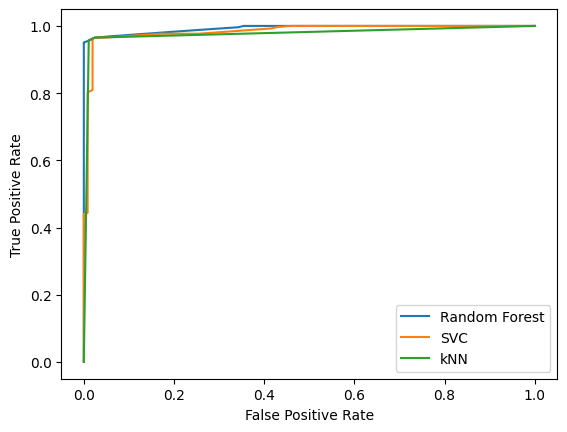

In [ ]:
fpr, tpr, _ = roc_curve(y_test, rf_probs)
pyplot.plot(fpr, tpr, label='Random Forest')
fpr, tpr, _ = roc_curve(y_test, svm_probs)
pyplot.plot(fpr, tpr, label='SVC')
fpr, tpr, _ = roc_curve(y_test, knn_probs)
pyplot.plot(fpr, tpr, label='kNN')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

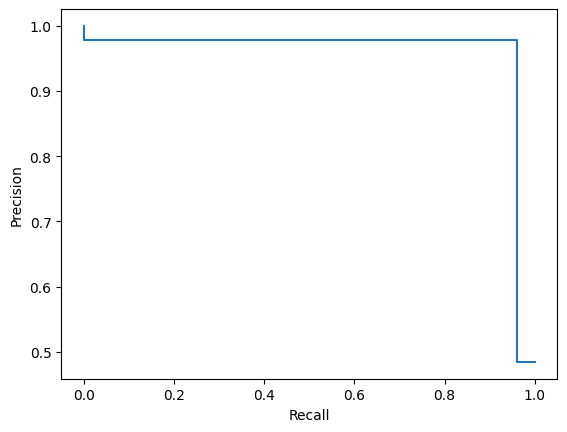

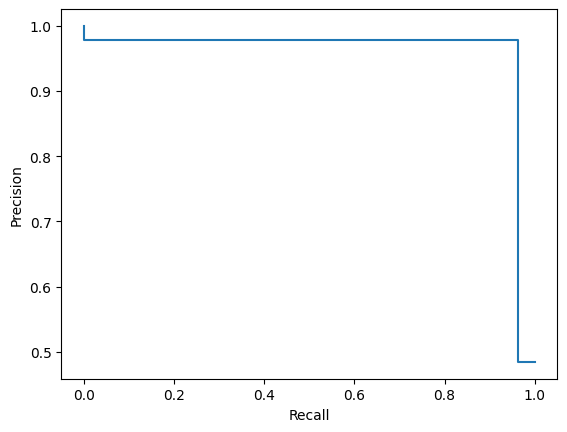

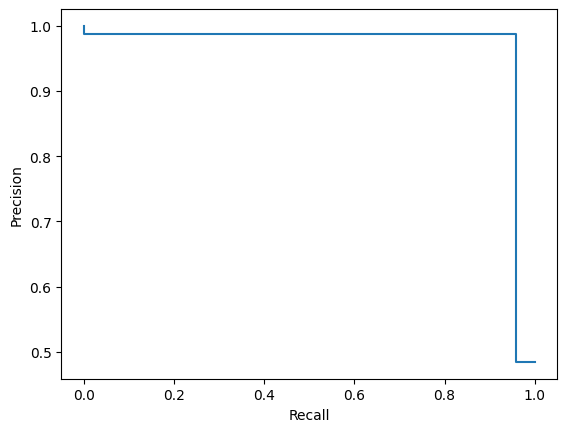

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve
# Precision recall graph

precision, recall, _ = precision_recall_curve(y_test, alg_rf.predict(X_test))
graph_prec_rec = PrecisionRecallDisplay(precision=precision, recall=recall)
graph_prec_rec.plot()

precision, recall, _ = precision_recall_curve(y_test, alg_svm.predict(X_test))
graph_prec_rec = PrecisionRecallDisplay(precision=precision, recall=recall)
graph_prec_rec.plot()

precision, recall, _ = precision_recall_curve(y_test, alg_knn.predict(X_test))
graph_prec_rec = PrecisionRecallDisplay(precision=precision, recall=recall)
graph_prec_rec.plot()

## Conclusion

The goal is to predict whether a certain mushroom is edible or not. The problem is a binary classification problem. The most promising features were selected based on the evaluation of the EDA and clustering part of the assignment. A pipeline was built and three classification algorithms have been selected for comparison: Random Forest Classifier, SVC and kNN.

The final evaluation for predicting the class is presented using ROC curves, classification report, and precision-recall curves. The precision/recall values were almost the same for all 3 models, and the same applies for TPR/FPR graph. High average precision of 0.97 was achieved for all models, and the shape of ROC curve resembles a cliff rather than a diagonal, which would mean that our model is innacurate. Looking in detail, kNN could be selected as the best model, since it is most accurate in identifying the poisonous mushrooms with 0.99 precision on the test set. This is the most important aspect, as misclassifying a poisonous mushroom could be very dangerous.